In order to successfully complete this assignment you need to demonstrate progress by showing this notebook to an instructor at the end of class on **Thursday September 17**.  If you are participating asyncronosly in the class you must attempt to complete the notebook and turn in a copy to the D2L Dropbox no later than 11:50pm on **Thursday September 17**.

# This in class assignment is incomplete but reflects the work done in class as a class.

# In-Class Assignment: Least Squares in Python


<img src="https://upload.wikimedia.org/wikipedia/en/e/ed/Least_Squares.gif" width="50%">



Todays in-class assignment includes multiple Least Squares Fit models.  The goal is to see the types of models that can be solved using least squares fit.  Even though this is a Linear Algebra Method the models do not need to be linear.  

**As soon as you get to class, download and start working on this notebook**: Try and help your neighbors. the instructor will go over solutions but make sure you try to understand and solve them on your own.

### Agenda for today's class (80 minutes)

1. [(20 minutes) Image Segmentation Example](#GAs)
1. [(20 minutes) Pre-class Review](#Pre-class_Review)
3. [(?? minutes) LSF Examples](#LSF_Examples)


----
<a name="GA"></a>

# 1. Image Segmentation Example

Let us do one last optimization algorithms. Lets breakout into smaller groups, and try to get the [SEE-Segment](https://github.com/colbrydi/see-segment) 


---
<a name="Pre-class_Review"></a>

# 2. Pre-class Review

* [0916--LA-pre-class-assignment](0916--LA-pre-class-assignment.ipynb)

----
<a name="LSF_Examples"></a>

 # 3. LSF Example: Tracking the Planets

<img src="https://images.squarespace-cdn.com/content/v1/537a20bce4b0c4a5e913ae77/1533010529325-0H1VQX4W19MAJCRGSTQF/ke17ZwdGBToddI8pDm48kJokDDWUnHQ7jYDwh9g9o2tZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpy5LokhjEjEjl7mG0bnsgbfHG96R3ZWfXdsfqmd9qx-1I79M1PjxisoyjE5_sBXuWQ/solar-system-439046_640.jpg?format=1500w" width="100%">
  
The following table lists the average distance from the sun to each of the first seven planets, using Earth's distance as a unit of measure (AUs). 

| Mercury | Venus | Earth | Mars | Jupiter | Satern | Uranus | 
|---------|-------|-------|------|---------|--------|--------|
| 0.39    | 0.72  | 1.00  | 1.52 | 5.20    | 9.54   | 19.2   |

The following is a plot of the data:

In [1]:
# Here are some libraries you may need to use

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

Text(0, 0.5, 'Distance (AU)')

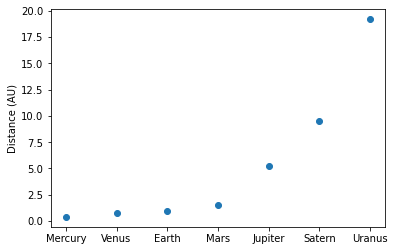

In [2]:
distances = [0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.2]
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Satern','Uranus']
ind = [1.0,2.0,3.0,4.0,5.0,6.0,7.0]

plt.scatter(ind, distances);
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

**Note** that the above plot does not look like a line, and so finding the line of best fit is not fruitful.  It does, however look like an exponential curve (maybe a polynomial?). The following step transforms the distances using the numpy **```log```** function and generates a plot that looks much more linear. 

Text(0, 0.5, 'Distance (log(AU))')

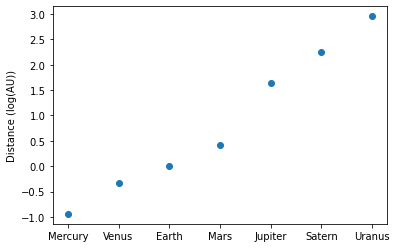

In [3]:
log_distances = np.log(distances)

plt.scatter(ind,log_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (log(AU))')

For this question we are going to find the coefficients ($c$) for the best fit line of the form $c_1 + c_2i= \log{d}$, where $i$ is the index of the planet and $d$ is the distance.  

The following code constructs this problem in the form $Ax=b$ and define the $A$ matrix and the $b$ matrix as numpy matrices

In [4]:
A = np.matrix(np.vstack((np.ones(len(ind)),ind))).T
b = np.matrix(log_distances).T
sym.Matrix(A)

⎡1.0  1.0⎤
⎢        ⎥
⎢1.0  2.0⎥
⎢        ⎥
⎢1.0  3.0⎥
⎢        ⎥
⎢1.0  4.0⎥
⎢        ⎥
⎢1.0  5.0⎥
⎢        ⎥
⎢1.0  6.0⎥
⎢        ⎥
⎣1.0  7.0⎦

In [5]:
sym.Matrix(b)

⎡-0.941608539858445⎤
⎢                  ⎥
⎢-0.328504066972036⎥
⎢                  ⎥
⎢       0.0        ⎥
⎢                  ⎥
⎢0.418710334858185 ⎥
⎢                  ⎥
⎢ 1.64865862558738 ⎥
⎢                  ⎥
⎢ 2.2554934854602  ⎥
⎢                  ⎥
⎣ 2.95491027903374 ⎦

&#9989; <font color=red>**DO THIS:**</font> Solve for the best fit of $Ax=b$ and define a new variable $c$ which consists of the of the two coefficients used to define the line $(\log{d} = c_1 + c_2i)$

In [6]:
c,err,_,_ = np.linalg.lstsq(A,b, rcond=None)
c

matrix([[-1.78550715],
        [ 0.66093608]])

&#9989; <font color=red>**DO THIS:**</font> Modify the following code (as needed) to plot your best estimates of $c_1$ and $c_2$ against the provided data.  

Text(0, 0.5, 'Distance (log(AU))')

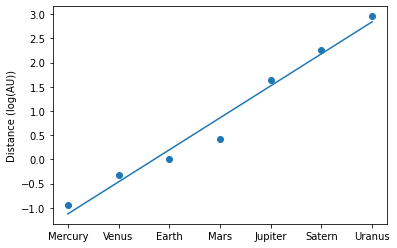

In [7]:
## Modify the following code

est_log_distances = (c[0] + c[1]*np.matrix(ind)).tolist()[0]
plt.plot(ind,est_log_distances)

plt.scatter(ind,log_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (log(AU))')

We can determine the quality of this line fit by calculating the root mean squared error between the estimate and the actual data:

In [8]:
rmse = np.sqrt(((np.array(log_distances)  - np.array(est_log_distances)) ** 2).mean())
rmse

Finally, we can also make the plot on the original axis using the inverse of the log (i.e. the exp function):

Text(0, 0.5, 'Distance (AU)')

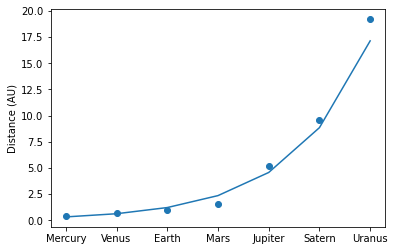

In [9]:
est_distances = np.exp(est_log_distances)
plt.scatter(ind,distances)
plt.plot(ind,est_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

The asteroid belt between Mars and Jupiter is what is left of a planet that broke apart.  Let's the above calculation again but renumber so that  the index of Jupyter is 6, Saturn is 7 and Uranus is 8 as follows:

In [10]:
distances = [0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.2]
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Satern','Uranus']
ind = [1,2,3,4,6,7,8]

log_distances = np.log(distances)

&#9989; <font color=red>**DO THIS:**</font> Repeat the calculations from above with the updated model.  Plot the results and compare the RMSE.

In [11]:
## Copy and Paste code from above

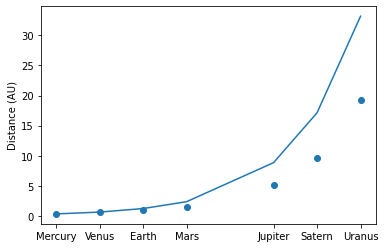

In [12]:
## Copy and Paste code from above
est_log_distances = (c[0] + c[1]*np.matrix(ind)).tolist()[0]

est_distances = np.exp(est_log_distances)
plt.scatter(ind,distances)
plt.plot(ind,est_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

rmse = np.sqrt(((np.array(log_distances)  - np.array(est_log_distances)) ** 2).mean())
rmse
## Copy and Paste code from above

This model of planet location was used to help discover Neptune and prompted people to look for the "missing planet" in position 5 which resulted in the discovery of the asteroid belt.  Based on the above model, what is the estimated  distance of the asteroid belt and Neptune (index 9) from the sun in AUs? (**Hint:** you can check your answer by searching for the answer on-line).

In [13]:
#Put your prediction calcluation here

----
<a name="Predator-Pray_Model"></a>
         
## LSF Example: Predator-Pray Model 

<img src="https://cdn.pixabay.com/photo/2016/06/14/15/46/cat-1456878_1280.png" width=30%>

The following example example data comes from https://mathematica.stackexchange.com/questions/34761/find-parameters-of-odes-to-fit-solution-data and represents some experimental data ```time```, ```x``` and ```y```.


$$dx = ax + bxy$$
$$dy = cy + dxy$$

The following code plots the data

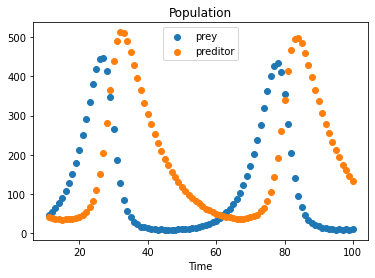

In [14]:
# (* The first column is time 't', the second column is coordinate 'x', and the last column is coordinate 'y'. *)
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

data=[[11,45.79,41.4],
      [12,53.03,38.9],[13,64.05,36.78],
      [14,75.4,36.04],[15,90.36,33.78],
      [16,107.14,35.4],[17,127.79,34.68],
      [18,150.77,36.61], [19,179.65,37.71],
      [20,211.82,41.98],[21,249.91,45.72],
      [22,291.31,53.1],[23,334.95,65.44],
      [24,380.67,83.],[25,420.28,108.74],
      [26,445.56,150.01],[27,447.63,205.61],
      [28,414.04,281.6],[29,347.04,364.56],
      [30,265.33,440.3],[31,187.57,489.68],
      [32,128.,512.95],[33,85.25,510.01],
      [34,57.17,491.06],[35,39.96,462.22],
      [36,29.22,430.15],[37,22.3,396.95],
      [38,16.52,364.87],[39,14.41,333.16],
      [40,11.58,304.97],[41,10.41,277.73],
      [42,10.17,253.16],[43,7.86,229.66],
      [44,9.23,209.53],[45,8.22,190.07],
      [46,8.76,173.58],[47,7.9,156.4],
      [48,8.38,143.05],[49,9.53,130.75],
      [50,9.33,117.49],[51,9.72,108.16],
      [52,10.55,98.08],[53,13.05,88.91],
      [54,13.58,82.28],[55,16.31,75.42],
      [56,17.75,69.58],[57,20.11,62.58],
      [58,23.98,59.22],[59,28.51,54.91],
      [60,31.61,49.79],[61,37.13,45.94],
      [62,45.06,43.41],[63,53.4,41.3],
      [64,62.39,40.28],[65,72.89,37.71],
      [66,86.92,36.58],[67,103.32,36.98],
      [68,121.7,36.65],[69,144.86,37.87],
      [70,171.92,39.63],[71,202.51,42.97],
      [72,237.69,46.95],[73,276.77,54.93],
      [74,319.76,64.61],[75,362.05,81.28],
      [76,400.11,105.5],[77,427.79,143.03],
      [78,434.56,192.45],[79,410.31,260.84],
      [80,354.18,339.39],[81,278.49,413.79],
      [82,203.72,466.94],[83,141.06,494.72],
      [84,95.08,499.37],[85,66.76,484.58],
      [86,45.41,460.63],[87,33.13,429.79],
      [88,25.89,398.77],[89,20.51,366.49],
      [90,17.11,336.56],[91,12.69,306.39],
      [92,11.76,279.53],[93,11.22,254.95],
      [94,10.29,233.5],[95,8.82,212.74],
      [96,9.51,193.61],[97,8.69,175.01],
      [98,9.53,160.59],[99,8.68,146.12],[100,10.82,131.85]]
data = np.array(data)
t = data[:,0]
x = data[:,1]
y = data[:,2]
plt.scatter(t,x)
plt.scatter(t,y)
plt.legend(('prey', 'preditor'))
plt.xlabel('Time')
plt.title('Population');

&#9989; **<font color=red>DO THIS</font>** Use Numerical Differentiation to calculate $dx$ and $dy$ from $x$ and $y$. See if you can plot $x,dx$ nad $y,dy$ on a couple of plots. Use the plots to try and check to make sure your results make senes.  

In [15]:
# Put your answer here

&#9989; <font color=red>**DO THIS**</font>  Formulate two linear systems ($Ax=b$) and solve them using LSF as we did in the pre-class. Use one to solve the first ODE and the second to solve the second ODE.  Remember, we are trying to estimate values for $a,b,c,d$ 

In [16]:
#Put your answer here.

Assuming everything worked the following should plot the result.

In [17]:
from scipy.integrate import odeint
# The above ODE model sutiable for ODEINT
def deriv(position,t,a,b,c,d):
    x = position[0]
    y = position[1]
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return (dx,dy)

# Integrate equations over the time grid, t.
ret = odeint(deriv, (data[0,1],data[0,2]), t, args=(a,b,c,d))

#Plot the model on the data
plt.plot(t,ret)
plt.scatter(t, data[:,1])
plt.scatter(t, data[:,2]);
plt.legend(('x est', 'y est', 'x', 'y'))
plt.xlabel('Time');

NameError: name 'a' is not defined

----
<a name="Estimating_the_best_Ellipses"></a>
## LSF Example: Estimating the best Ellipses

<img src="https://thumbs.gfycat.com/WhimsicalUnequaledBuzzard-max-1mb.gif" width="30%">
  

In [19]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

Now consider the following sets of points. Think of these as observations of planet moving in an elliptical orbit. 

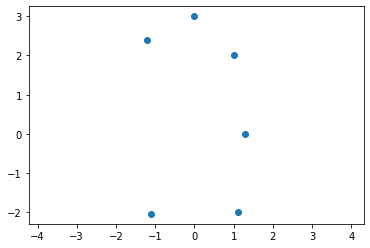

In [20]:
x=[0, 1.0, 1.1, -1.1, -1.2, 1.3]
y =[2*1.5, 2*1.0, 2*-0.99, 2*-1.02, 2*1.2, 2*0]

plt.scatter(x,y)
plt.axis('equal')

In this problem we want to try to fit an ellipse to the above data.  First lets look at a general equation for an ellipse:

$$ \frac{(u+x)^2}{a^2} + \frac{(v+y)^2}{b^2} = 1 \qquad \qquad \text{    (1)}$$

Where $u$ and $v$ are the $x$ and $y$ coordinates for the center of the ellipse and $a$ and $b$ are the lengths of the axes sizes of the ellipse.  A quick search on how to plot an ellipse in python comes up with the following example:

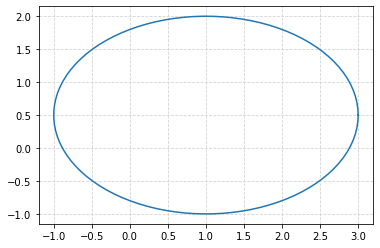

In [21]:
# Code from: https://stackoverflow.com/questions/10952060/plot-ellipse-with-matplotlib-pyplot-python

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*np.pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

Notice this example uses equations of the form:

$$t = [0, \dots, 2\pi]$$
$$x = u+a\cos(t)$$
$$y = v+b\sin(t)$$

Turns out that this form of the equation is easier to plot and the variables $u,v,a,b$ are the same as our original equation. 

Now lets expand the original equation (equation 1 from above) and we get the following:

$$x^2−2ux-u^2+y^2−2vy+v^2=r^2 \qquad \qquad \text{    (2)}$$

&#9989; **<font color=red>QUESTION:</font>** Why can't we convert equation 2 into the form $Ax=b$ and solve using Least Squares Fit? Discuss with your group and be prepared to share your thought with the class.

Put your answer to the above question here.

If we look at our data more closely we can simplify equations 1 and 2 by assuming the the centroid (u,v) is at the origin.  This assumption results in the following equation:

$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 $$

Notice we can rewrite this into a standard linear set of equations by defining $c_o = \frac{1}{a^2}$ and $c_1 = \frac{1}{b^2}$ and rewriting the equation as follows:


$$ c_0x^2 + c_1y^2 = 1 $$

&#9989; <font color=red>**DO THIS**</font> Given that we know the $x$ and $y$ values of our point observations, equation 4 is now linear and can be solved using Least Squares Fit.  Using the observation points from above construct  ```A``` and ```b``` as numpy matrixes for the overdefined system $Ax=b$

Put your answer to the above question here.

In [22]:
sym.Matrix(A)

⎡1.0  1.0⎤
⎢        ⎥
⎢1.0  2.0⎥
⎢        ⎥
⎢1.0  3.0⎥
⎢        ⎥
⎢1.0  4.0⎥
⎢        ⎥
⎢1.0  5.0⎥
⎢        ⎥
⎢1.0  6.0⎥
⎢        ⎥
⎣1.0  7.0⎦

In [23]:
sym.Matrix(b)

TypeError: 
Data type not understood; expecting list of lists or lists of values.

&#9989; **<font color=red>DO THIS:</font>** Solve the above over defined system of linear equations for $c_0$ and $c_1$ using LSF.

In [ ]:
# Put your answer to the above question here

Assuming we have $c$ in the correct format, we can now calculate $a$ and $b$ from the solution for $c_o$ and $c_1$ calculated in the previous step and plot using our plotting code:

In [ ]:
c = 1/np.sqrt(np.abs(c))
b=c[1,0] 
a=c[0,0]
print(a,b)

In [ ]:
u=0     #x-position of the center
v=0     #y-position of the center

t = np.linspace(0, 2*np.pi, 100)
plt.plot(u+a*np.cos(t) , v+b*np.sin(t) )
plt.scatter(x,y)
plt.grid(color='lightgray',linestyle='--')
plt.axis('equal');

-----
### Congratulations, we're done!

### Course Resources:


- [Website](https://msu-cmse-courses.github.io/cmse802-f20-student/)
- [ZOOM](https://msu.zoom.us/j/97272546850)
- [Syllabus](https://docs.google.com/document/d/e/2PACX-1vT9Wn11y0ECI_NAUl_2NA8V5jcD8dXKJkqUSWXjlawgqr2gU5hII3IsE0S8-CPd3W4xsWIlPAg2YW7D/pub)
- [Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vQRAm1mqJPQs1YSLPT9_41ABtywSV2f3EWPon9szguL6wvWqWsqaIzqkuHkSk7sea8ZIcIgZmkKJvwu/pubhtml?gid=2142090757&single=true)



Writen by Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.